# Multiple Linear Regression Model

Here we will develop a model to estimate price of house given the following parameters
 -  Size
 -  No. of Bedrooms
 -  No. of Bathrooms
 -  Distance to City
 -  Age of House
 -  School Quality

For the model I will be using a training set of 1000 records generated from AI.

In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Linear Regression Model

The equation of the linear regression model is given by:

$$ f(x_{1},x_{2},....,x_{n}) = \sum \limits _{i=1} ^{n} w_{i}x_{i}\:+\:B $$

Where:
- $f(x_{1},x_{2},....,x_{n})$ is the prediction of the model ( $ \hat{Y} $ ) for given set of inputs
- n is the no. of independent variables
- $x_{i}$ is the independent variable
- $B$ is the y-intercept
- $w_{i}$ is the slope of the line with respect to $x_{i}$

## Cost Function

Equation of the model should give good approxiamtion for the given inputs. Therefore we use least squares approach to ensure our models gives better approximation for the given inputs.<br> 
Cost function gives normalized value for sum of squares of error generated by model for known output values.

$$ J(w,b) = \frac{1}{2m} \sum \limits _{i=1} ^{m} [f(x_{1},x_{2},....,x_{n})-y_{i}]^2 $$

Where :
 - $m$ is the no. of training examples
 - $y_{i}$ is the actual output of for given set of inputs 


In [2]:
def model_func(X,W,B):
    '''
    This function returns the output of the model
        X: input data as a numpy 2D array
        W: Weights as a numpy array
        B: Bias
    '''
    Y_hat=np.dot(X,W)+B

    return Y_hat

def cost_func(Y_hat,Y):
    '''
    This function returns the cost of the model
        input_data: input data as a 2-D numpy array
        output_data: output data as a numpy array
    '''
    return np.mean((Y_hat - Y)**2)/2

we need to find $w_{i},B$ for $f$ minimize the cost functions. lower the value of cost function is, better the approximation of the model gets.<br>
By differentiating $J(w,B)$ with respect to the parameters and equating it to zero we can have a set of simultaneous equations which can be solved to find the parameters.<br>
For data sets with large number of inputs it could get complex to solve the set of simultaneous equations. So here we use ___gradient descent algorithm___ which is an _iteretive technique_ to find $w,B$<br>

$$ w_{n} = w_{n-1}-\alpha \frac {\partial{J(w,B)}}{\partial{w}} $$ 
$$B_{n} = B_{n-1}-\alpha \frac {\partial{J(w,B)}}{\partial{B}}$$


$\frac {\displaystyle\partial{J(w,B)}}{\displaystyle\partial{w_{k}}} = \sum \limits _{i=1} ^{m} [w_{1}x_{i,1}+w_{2}x_{i,2}+...+w_{k}x_{i,k}+...+w_{n}x_{i,n}+B-y_{i}] \frac {x_{k}}{m}$


In [9]:
%matplotlib inline

def para_update(X,Y,W,B,alpha,error):
    '''
    This function updates the parameters of the model
        X: input data as a numpy array
        Y: output data as a numpy array
        W: Weights as a numpy array
        B: Bias
        alpha: learning rate
        error : allowed relative error
    '''
    W_history = list()
    B_history = list()
    Cost_fn=list()
    while True:
        print('W:',W)
        print('B:',B)
        Y_hat = model_func(X,W,B)   #calculate the output of the model for existing W and B
        Wn = W - alpha*np.dot(X.T,(Y_hat - Y))/X.shape[0] #update the weights
        Bn = B - alpha*np.sum(Y_hat - Y)/X.shape[0] #update the bias

        W_history.append(W)
        B_history.append(B)
        Cost_fn.append(cost_func(Y_hat,Y))
        
        rel_error_w = np.max(np.abs(Wn-W))/np.max(np.abs(W)) #calculate the relative error for W
        rel_error_b=abs(Bn/B-1) #calculate the relative error for B

        #updating W,B
        W=Wn
        B=Bn
        print('Realative errors W:',rel_error_w,'B:',rel_error_b)

        if rel_error_w<error and rel_error_b<error:
            W_history.append(W)
            B_history.append(B)
            break
    return W,B,W_history,B_history,Cost_fn

## Calculating Parameters for the Data set
Let's calculate W,B for our data set.


W: [0. 0. 0. 0. 0. 0.]
B: 0
Realative errors W: inf B: inf
W: [7.36821115e+00 9.90646106e-03 5.67925144e-03 2.90947486e-02
 6.77454082e-02 1.66259591e-02]
B: 0.0028430792079359997
Realative errors W: 0.9346138205553789 B: 0.9349513172784318
W: [1.42546431e+01 1.91732660e-02 1.09896145e-02 5.62578651e-02
 1.30948816e-01 3.22251726e-02]
B: 0.005501219858522683
Realative errors W: 0.4515128515451606 B: 0.45177153609016374
W: [2.06907977e+01 2.78422396e-02 1.59552095e-02 8.16156518e-02
 1.89907207e-01 4.68647757e-02]
B: 0.00798651440437719
Realative errors W: 0.290724370747227 B: 0.29095924643803284
W: [2.67061168e+01 3.59524718e-02 2.05985794e-02 1.05286153e-01
 2.44898149e-01 6.06075137e-02]
B: 0.010310264617141272
Realative errors W: 0.210513592378994 B: 0.21073840010341738
W: [3.23281174e+01 4.35404966e-02 2.49407935e-02 1.27379693e-01
 2.96181059e-01 7.35120294e-02]
B: 0.012483033287200497
Realative errors W: 0.16253342653508057 B: 0.1627536520175552
W: [3.75825171e+01 5.06404594e-02 

C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_21680\2571718719.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  rel_error_w = np.max(np.abs(Wn-W))/np.max(np.abs(W)) #calculate the relative error for W
C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_21680\2571718719.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rel_error_b=abs(Bn/B-1) #calculate the relative error for B


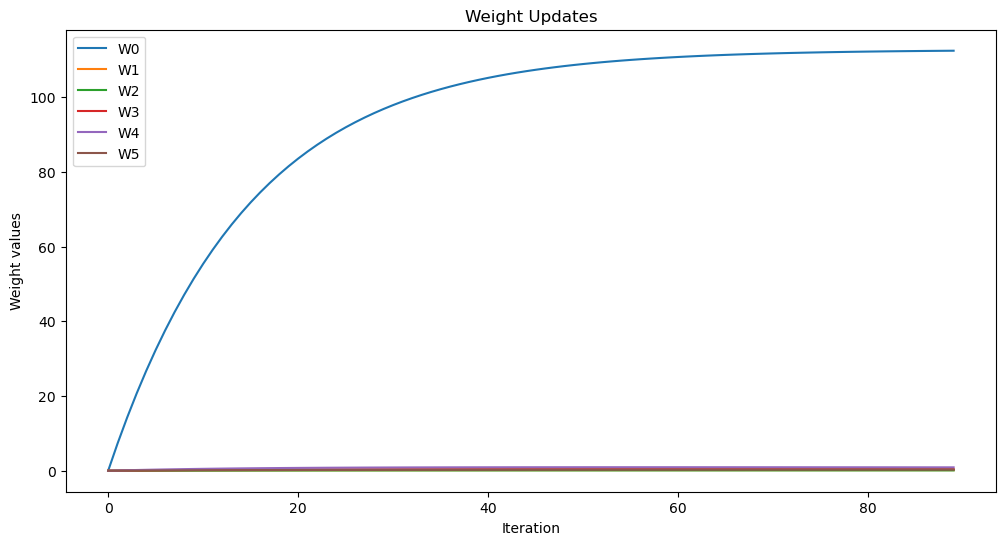

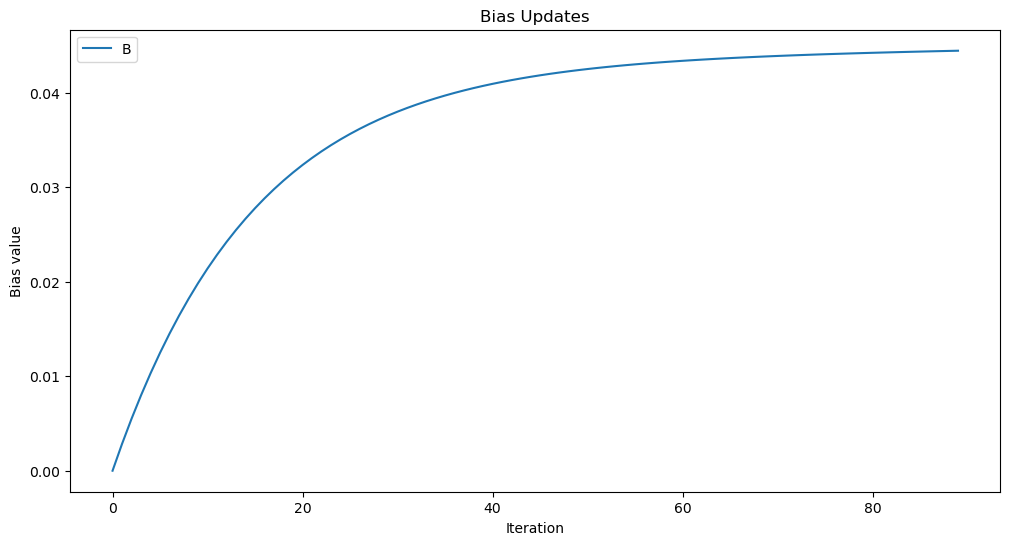

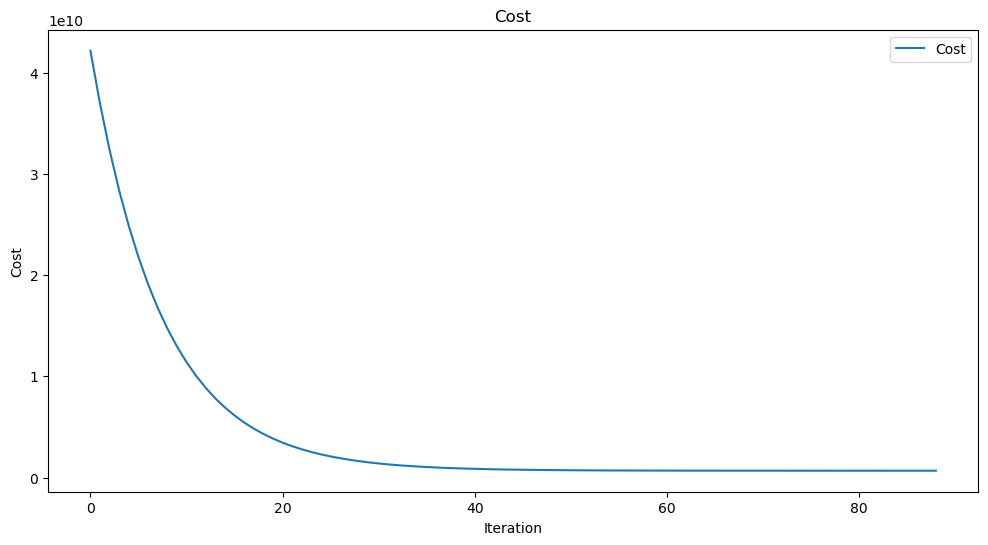

In [12]:
df=pd.read_csv("house_prices_dataset.csv")

X=df[['Size (sq ft)','Bedrooms','Bathrooms','Distance to City Center (miles)','Age of House (years)','School Quality']].to_numpy()
Y=df['Price ($)'].to_numpy()
W=np.array([0,0,0,0,0.0,0])
B=0
alpha=0.00000001
error=0.0005



W,B,W_history,B_history,Costs=para_update(X,Y,W,B,alpha,error)
yhat=model_func(X,W,B)

plt.figure(figsize=(12, 6))

# Plot W updates
for i in range(len(W)):
    plt.plot([w[i] for w in W_history], label=f'W{i}')
plt.xlabel('Iteration')
plt.ylabel('Weight values')
plt.title('Weight Updates')
plt.legend()
plt.show()

# Plot B updates
plt.figure(figsize=(12, 6))
plt.plot(B_history, label='B')
plt.xlabel('Iteration')
plt.ylabel('Bias value')
plt.title('Bias Updates')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(Costs, label='Cost')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost')
plt.legend()
plt.show()